In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [4]:
from naive_implementation.precision_recall import plot_precision as naive_precision, plot_recall as naive_recall
from using_kde.precision_recall import plot_precision as kde_precision, plot_recall as kde_recall
from using_fastkde.precision_recall import plot_precision as fast_precision, plot_recall as fast_recall

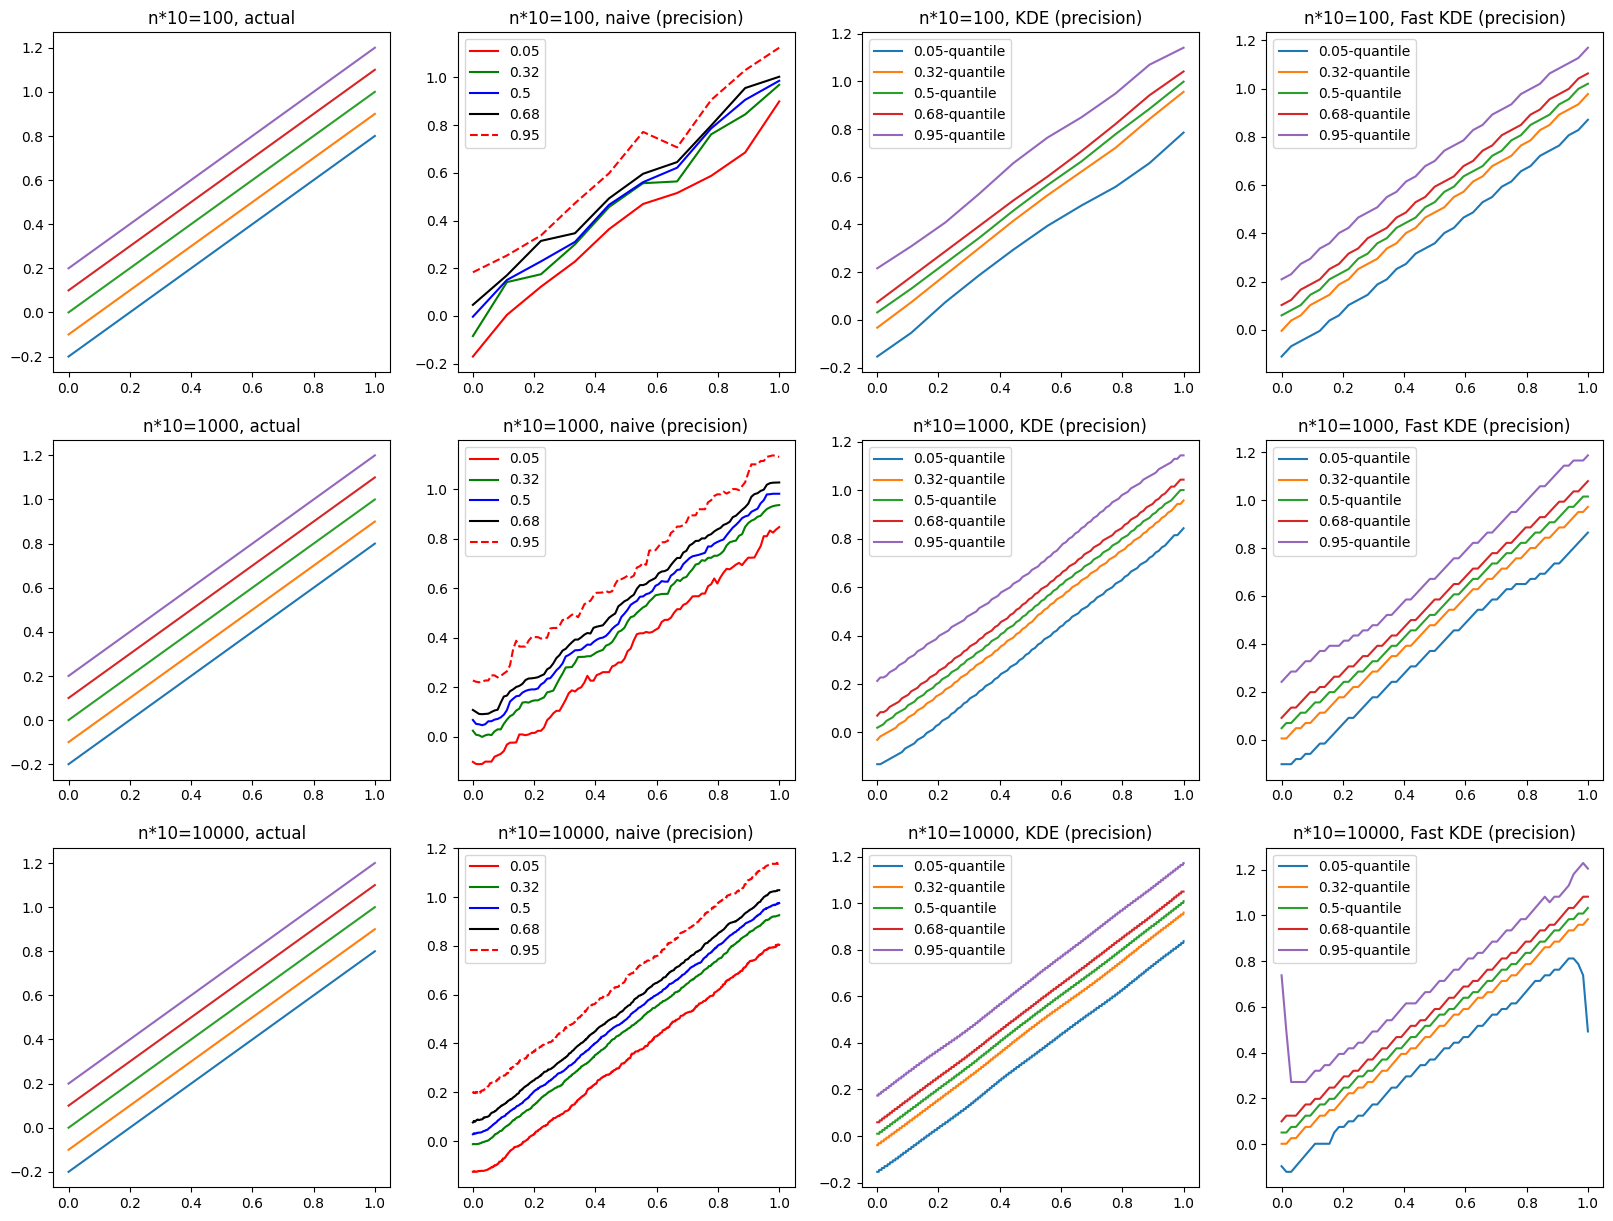

In [7]:
fig, axs = plt.subplots(3, 4)
fig.set_figwidth((6/1.2) * 4)
fig.set_figheight((6/1.2) * 3)

for i, n in enumerate(np.logspace(1, 3, num=3, endpoint=True, dtype=int)):
    act = np.vstack([np.linspace(0, 1, num=n) + stats.norm.rvs(loc=0.0, scale=0.1, size=n) for _ in range(10)]).flatten()
    pred = np.vstack([np.linspace(0, 1, num=n) for _ in range(10)]).flatten()

    axs[i, 0].set_title(f'{n*10=}, actual')
    axs[i, 1].set_title(f'{n*10=}, naive (precision)')
    axs[i, 2].set_title(f'{n*10=}, KDE (precision)')
    axs[i, 3].set_title(f'{n*10=}, Fast KDE (precision)')


    axs[i, 0].plot([0, 1], [-0.2, 0.8],
            [0, 1], [-0.1, 0.9],
            [0, 1], [0, 1],
            [0, 1], [0.1, 1.1],
            [0, 1], [0.2, 1.2])
    naive_precision(y_act=act, y_pred=pred, plt_mode='raw', quantiles=[0.05, 0.32, 0.5, 0.68, 0.95], ax=axs[i, 1])
    kde_precision(y_act=act, y_pred=pred, plt_mode='raw', quantiles=[0.05, 0.32, 0.5, 0.68, 0.95],   ax=axs[i, 2])
    fast_precision(y_act=act, y_pred=pred, plt_mode='raw', quantiles=[0.05, 0.32, 0.5, 0.68, 0.95],  ax=axs[i, 3])

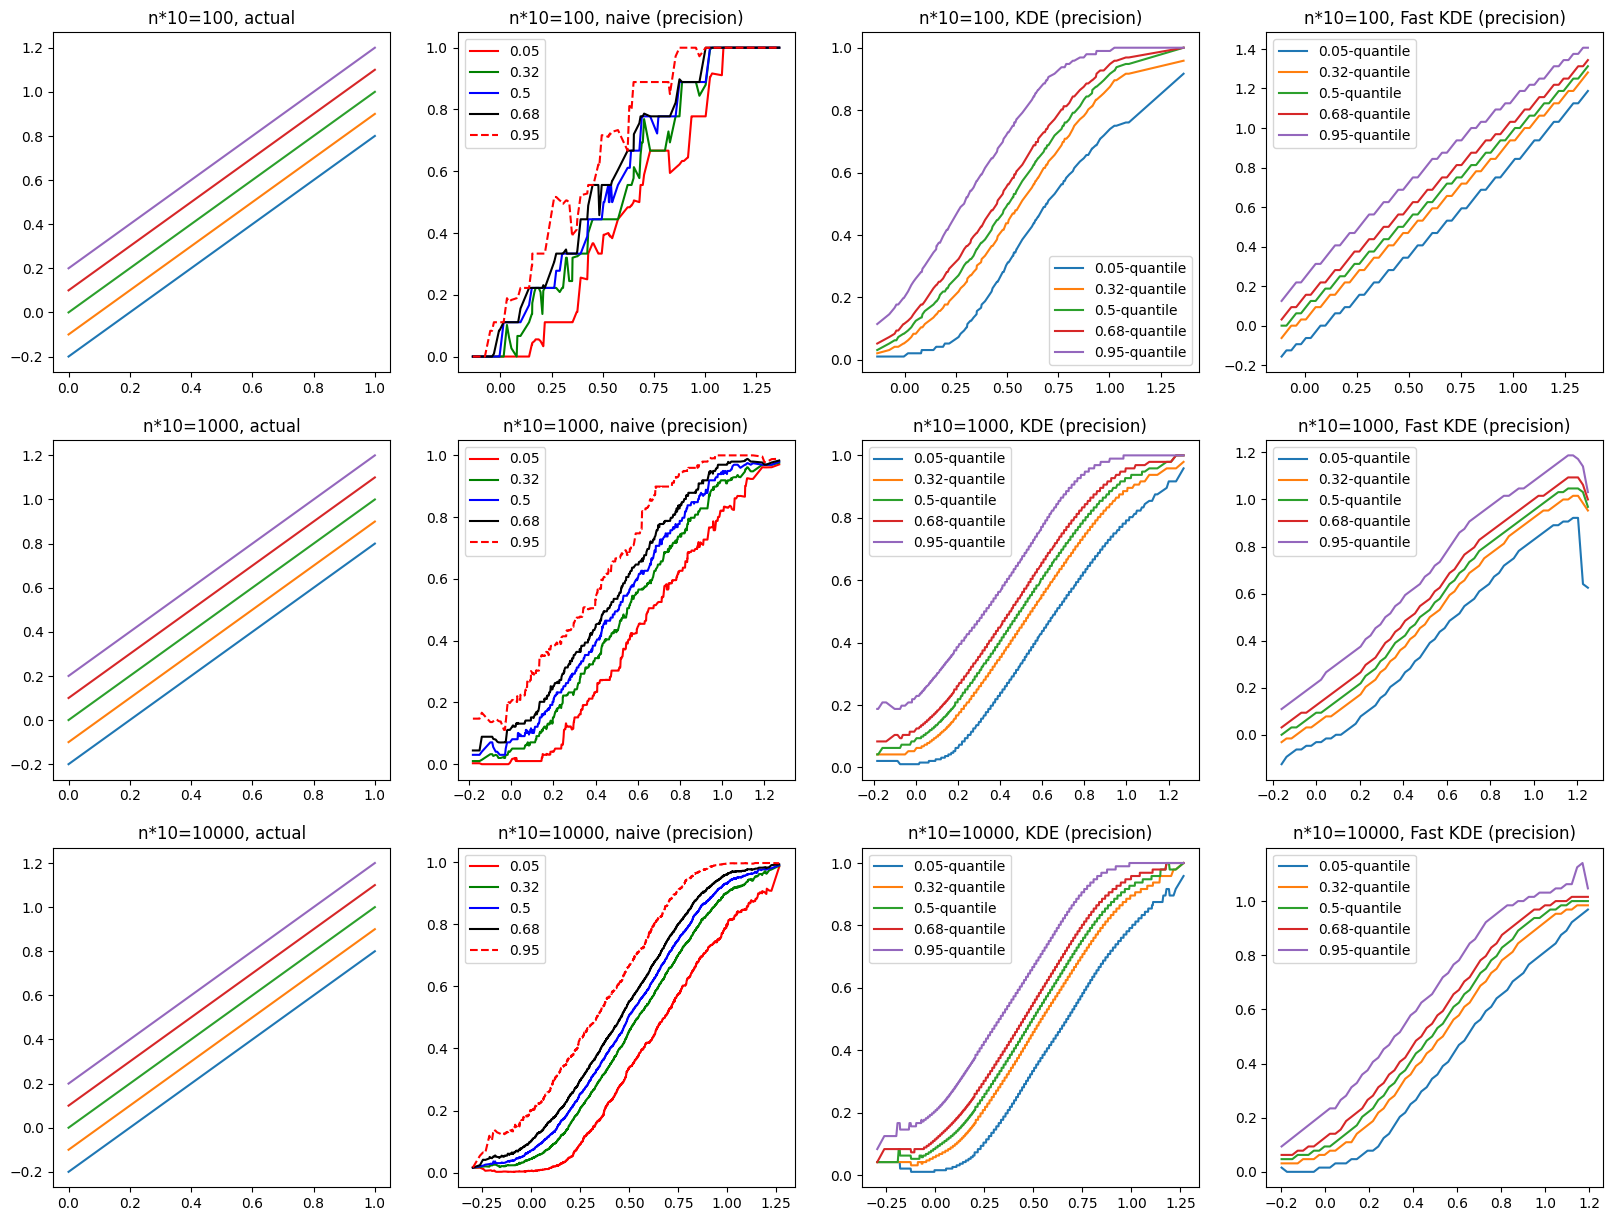

In [4]:
fig, axs = plt.subplots(3, 4)
fig.set_figwidth((6/1.2) * 4)
fig.set_figheight((6/1.2) * 3)

for i, n in enumerate(np.logspace(1, 3, num=3, endpoint=True, dtype=int)):
    act = np.vstack([np.linspace(0, 1, num=n) + stats.norm.rvs(loc=0.0, scale=0.1, size=n) for _ in range(10)]).flatten()
    pred = np.vstack([np.linspace(0, 1, num=n) for _ in range(10)]).flatten()

    axs[i, 0].set_title(f'{n*10=}, actual')
    axs[i, 1].set_title(f'{n*10=}, naive (precision)')
    axs[i, 2].set_title(f'{n*10=}, KDE (precision)')
    axs[i, 3].set_title(f'{n*10=}, Fast KDE (precision)')


    axs[i, 0].plot([0, 1], [-0.2, 0.8],
            [0, 1], [-0.1, 0.9],
            [0, 1], [0, 1],
            [0, 1], [0.1, 1.1],
            [0, 1], [0.2, 1.2])
    naive_recall(y_act=act, y_pred=pred, plt_mode='raw', quantiles=[0.05, 0.32, 0.5, 0.68, 0.95], ax=axs[i, 1])
    kde_recall(y_act=act, y_pred=pred, plt_mode='raw', quantiles=[0.05, 0.32, 0.5, 0.68, 0.95],   ax=axs[i, 2])
    fast_recall(y_act=act, y_pred=pred, plt_mode='raw', quantiles=[0.05, 0.32, 0.5, 0.68, 0.95],  ax=axs[i, 3])

In [6]:
n = 1_000

# dist = stats.norm.rvs(0, 1, size=(n, 2))
pred = stats.uniform.rvs(loc=0, scale=1, size=n)
act = pred + stats.norm.rvs(0, 0.1, size=n)

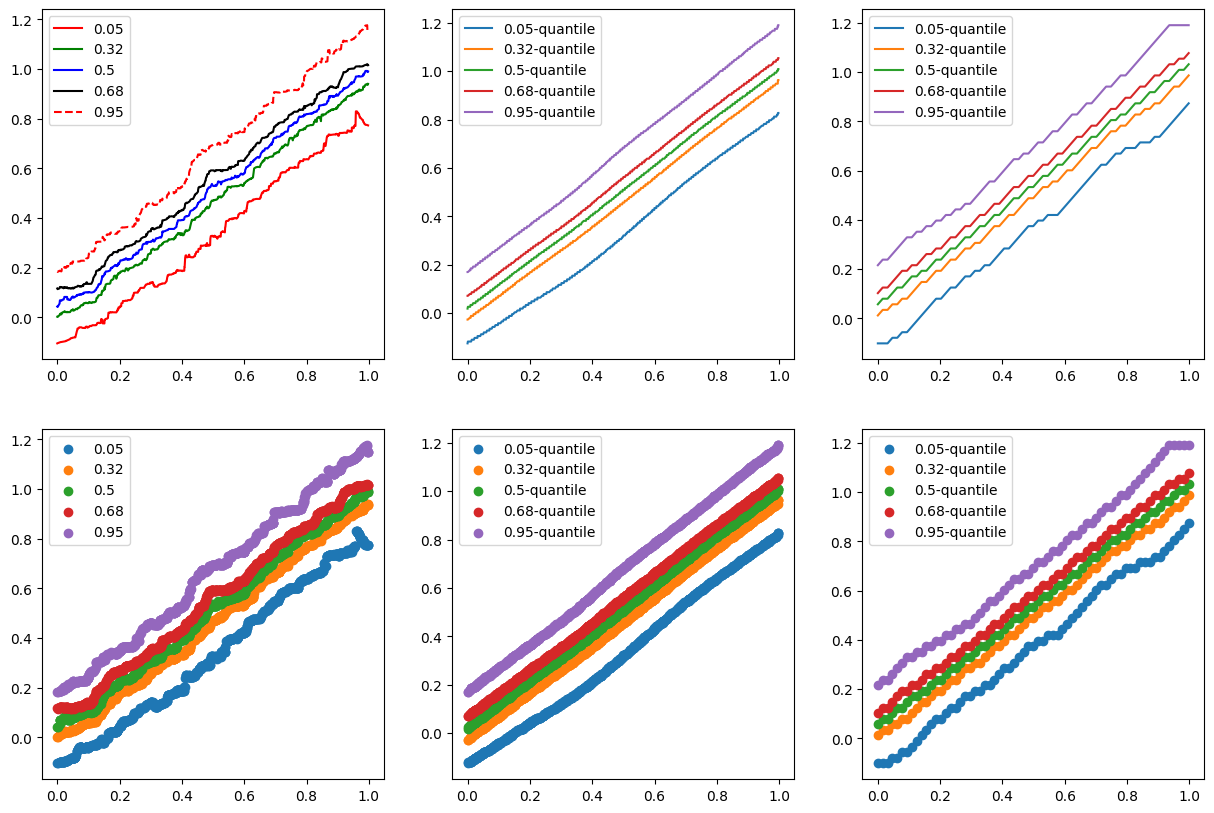

In [7]:
fig, axs = plt.subplots(2, 3)
fig.set_figwidth((6/1.2) * 3)
fig.set_figheight((6/1.2) * 2)

# axs[0].set_title(f'n={n}, naive (precision)')
# axs[1].set_title(f'n={n}, KDE (precision)')
# axs[2].set_title(f'n={n}, Fast KDE (precision)')

naive_precision(y_act=act, y_pred=pred, plt_mode='raw', plotter_mode='plot', quantiles=[0.05, 0.32, 0.5, 0.68, 0.95], ax=axs[0, 0])
kde_precision(y_act=act, y_pred=pred, plt_mode='raw', plotter_mode='plot', quantiles=[0.05, 0.32, 0.5, 0.68, 0.95],   ax=axs[0, 1])
fast_precision(y_act=act, y_pred=pred, plt_mode='raw', plotter_mode='plot', quantiles=[0.05, 0.32, 0.5, 0.68, 0.95],  ax=axs[0, 2])

naive_precision(y_act=act, y_pred=pred, plt_mode='raw', plotter_mode='scatter', quantiles=[0.05, 0.32, 0.5, 0.68, 0.95], ax=axs[1, 0])
kde_precision(y_act=act, y_pred=pred, plt_mode='raw', plotter_mode='scatter', quantiles=[0.05, 0.32, 0.5, 0.68, 0.95],   ax=axs[1, 1])
fast_precision(y_act=act, y_pred=pred, plt_mode='raw', plotter_mode='scatter', quantiles=[0.05, 0.32, 0.5, 0.68, 0.95],  ax=axs[1, 2])

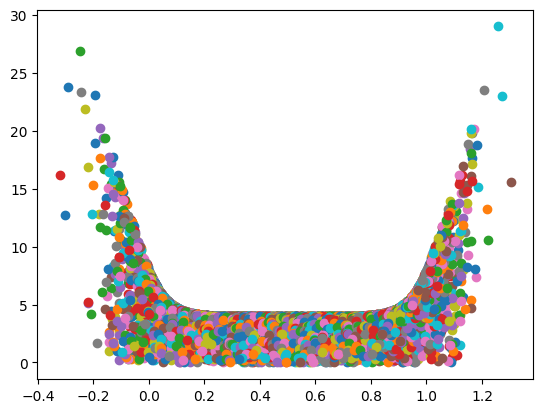

In [8]:
act = np.vstack([np.linspace(0, 1, num=n) + stats.norm.rvs(loc=0.0, scale=0.1, size=n) for _ in range(10)]).flatten()
pred = np.vstack([np.linspace(0, 1, num=n) for _ in range(10)]).flatten()

# quant_sp = np.zeros(act.shape)

for i, y_0 in enumerate(act):
    val = (stats.norm.pdf(y_0, loc=pred[i], scale=0.1)) / (stats.norm.cdf(1, loc=y_0, scale=0.1) - stats.norm.cdf(0, loc=y_0, scale=0.1))
    plt.scatter(y_0, val)